<a href="https://colab.research.google.com/github/ThiagoMilanezPinheiro/MachineLearning-SGBF/blob/main/4_VisualizeSeismicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading and visualizing seismic data in Python

In this session:
- we will use the [segpy](https://github.com/sixty-north/segpy) package to read the 3D volume we have been working with into a Jupyter notebook
- display seismic cross sections and time slices from this dataset
- think a bit about using colors and colormaps
- read horizon data from surfaces that have been interpreted in OpendTect
- create maps from these horizons

The goal is that, after going through this notebook, you should be able to read and visualize seismic and horizon data yourself.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from segpy.reader import create_reader
%matplotlib inline

### Read 3D data

In [ ]:
pip install segpy # we need to install the segpy package first

     |████████████████████████████████| 74 kB 1.4 MB/s 
     |████████████████████████████████| 49 kB 4.4 MB/s 
     |████████████████████████████████| 111 kB 35.7 MB/s 


In [ ]:
!wget https://www.dropbox.com/s/680edyveewojcxn/class2021_16_bit.sgy

--2021-10-27 18:33:32--  https://www.dropbox.com/s/680edyveewojcxn/class2021_16_bit.sgy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/680edyveewojcxn/class2021_16_bit.sgy [following]
--2021-10-27 18:33:32--  https://www.dropbox.com/s/raw/680edyveewojcxn/class2021_16_bit.sgy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfd381ec50cf8c3bf01347fefb1.dl.dropboxusercontent.com/cd/0/inline/BY25g_Nmpvl_ipt4nnXEhXemGUXIM3_krdpoDRXQ-gMeQbFEwdnkgmjfMkfdBWndpnsAcSQpKPehB8Tn95xPvfDaIZNZDOcbqAcBzR3qMLYyNY-6gGPEJ-7z5xShVtz_ZIYjsztCKQWaIv3GmDrEFUbV/file# [following]
--2021-10-27 18:33:32--  https://ucfd381ec50cf8c3bf01347fefb1.dl.dropboxusercontent.com/cd/0/inline/BY25g_Nmpvl_ipt4nnXEhXemGUXIM3_krdpoDRXQ-gMeQbFEwdnkgmjfMkfdBWndpn

In [ ]:
ls

class2021_16_bit.sgy  sample_data/


To be readable by 'segpy', we need a 16-bit seismic volume. You can create this volume yourself in OpendTect (Survey --> Export --> Seismic Data --> SEG-Y --> Volume... --> choose 'Integer (16-bits)' from 'SEG-Y format' dropdown menu), or you can download the one I have created from [here](https://www.dropbox.com/s/680edyveewojcxn/class2021_16_bit.sgy?dl=0).

In [ ]:
# create a segy reader
filename = 'class2021_16_bit.sgy'
fh = open(filename, 'rb')
reader = create_reader(fh)
print(reader.num_traces()) # number of traces

697761


In [ ]:
# read seismic traces into a numpy array
nt = reader.max_num_trace_samples() # maximum number of samples in a trace
n_inlines = reader.num_inlines() # number of inlines
n_xlines = reader.num_xlines() # number of crosslines
vol = np.zeros((n_inlines, n_xlines, nt)) # array of zeros to store seismic data
for i in range(n_xlines):
    for j in range(n_inlines):
        vol[j, i, :] = reader.trace_samples(j*n_xlines + i)

The data cube that we have read in has 1161 inlines, 601 crosslines, and 2001 time slices:

In [ ]:
np.shape(vol)

(1161, 601, 2001)

### Visualize seismic sections

In the cell below, we plot inline #500. These are the parameters that go into 'imshow':
- use the 'gray' colormap
- but, for seismic data, it also makes sense to use a diverging colormap that is centered on zero; the 'RdBu' colormap is a good choice
- use vmin and vmax to clip the data so that the colors are not too washed out
- you can use 'aspect' to change the vertical scaling of the section
- to use proper units on the y-axis, we need to convert the sample numbers to two-way-traveltimes. As one sample corresponds to 4 ms, we multiply by 4 to get the tick labels in ms.
- to use proper units on the x-axis, we multiply by 25, as one sample corresponds to 25 m. 

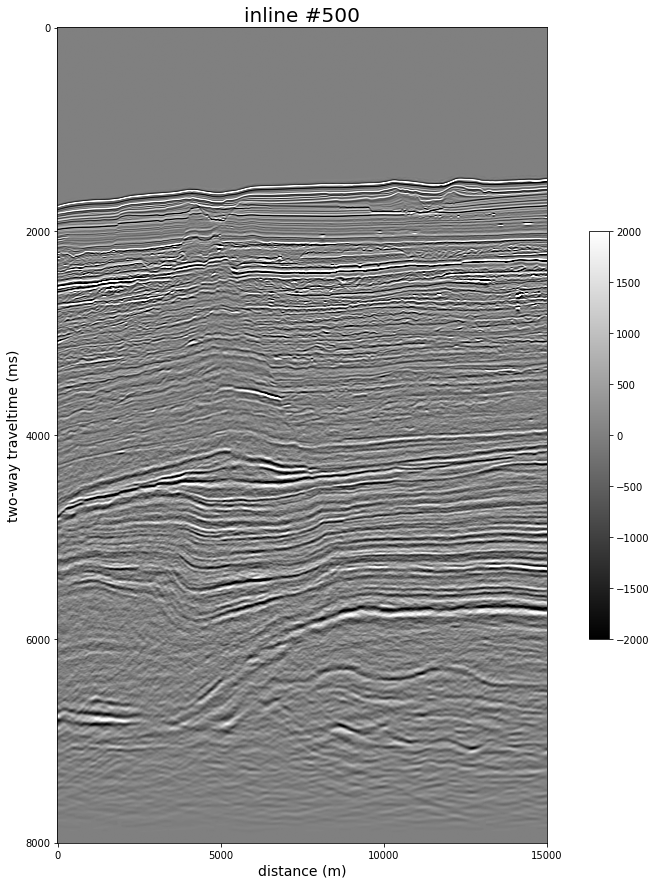

In [ ]:
plt.figure(figsize=(15,15))
im = plt.imshow(vol[500,:,:].T, cmap='gray', vmin=-2000, vmax=2000, aspect=0.5)
yticks = [0, 500, 1000, 1500, 2000]
ytick_labels = [str(4*t) for t in yticks] # use list comprehension to get labels
plt.yticks(ticks = yticks, labels = ytick_labels)
plt.ylabel('two-way traveltime (ms)', fontsize=14)
xticks = [0, 200, 400, 600]
xtick_labels = [str(25*t) for t in xticks]
plt.xticks(ticks = xticks, labels = xtick_labels)
plt.xlabel('distance (m)', fontsize=14)
plt.colorbar(im, shrink=0.5) # use the 'shrink' parameter to avoid creating a very large colorbar
plt.title('inline #500', fontsize=20);

Let's plot a section with the red-blue colormap as well:

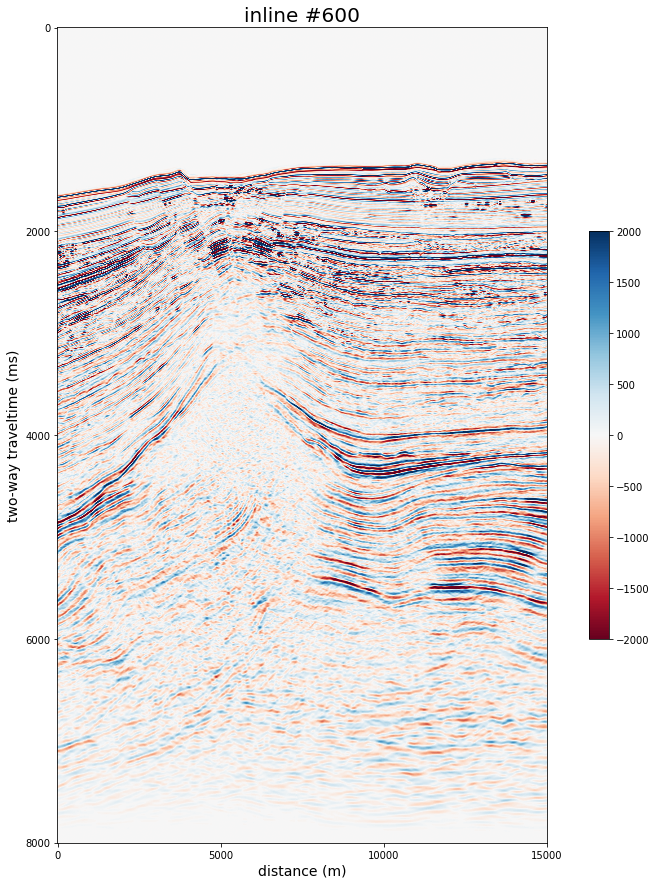

In [ ]:
plt.figure(figsize=(15,15))
im = plt.imshow(vol[600,:,:].T, cmap='RdBu', vmin=-2000, vmax=2000, aspect=0.5)
yticks = [0, 500, 1000, 1500, 2000]
ytick_labels = [str(4*t) for t in yticks] # use list comprehension to get labels
plt.yticks(ticks = yticks, labels = ytick_labels)
plt.ylabel('two-way traveltime (ms)', fontsize=14)
xticks = np.arange(0, n_xlines+1, 200)
xtick_labels = [str(25*t) for t in xticks]
plt.xticks(ticks = xticks, labels = xtick_labels)
plt.xlabel('distance (m)', fontsize=14)
plt.colorbar(im, shrink=0.5)
plt.title('inline #600', fontsize=20);

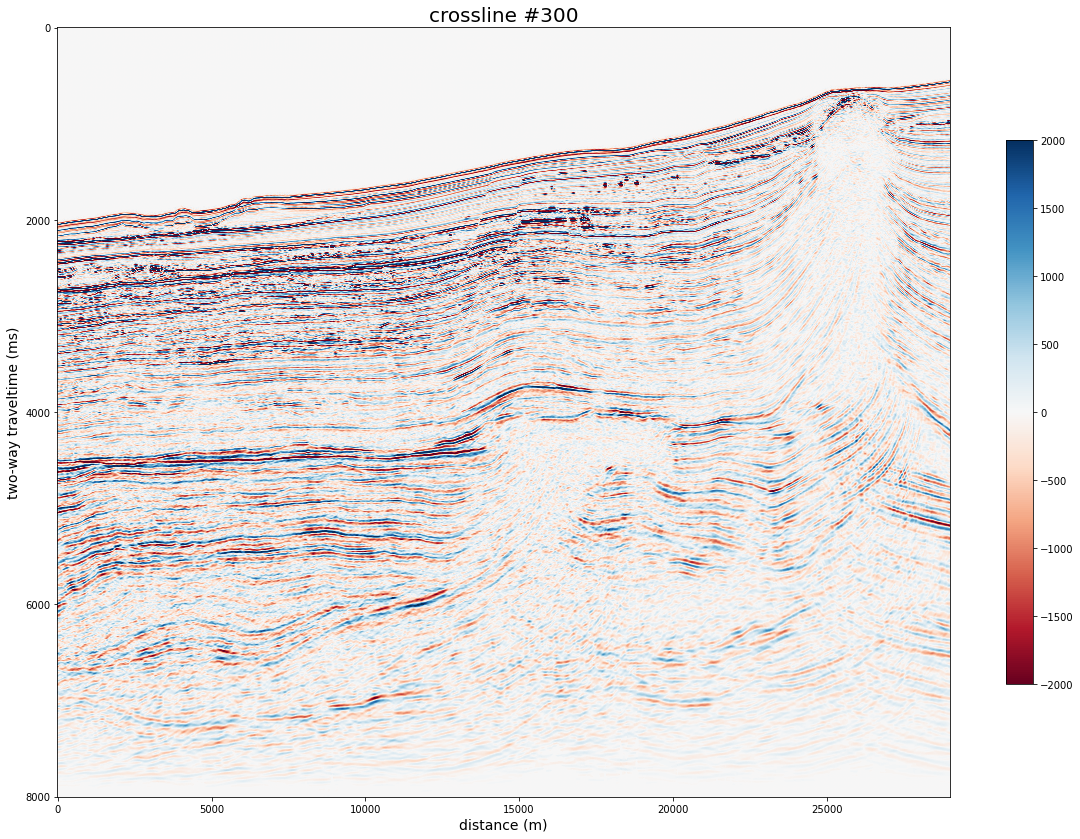

In [ ]:
plt.figure(figsize=(20,20))
im = plt.imshow(vol[:,300,:].T, cmap='RdBu', vmin=-2000, vmax=2000, aspect=0.5)
yticks = [0, 500, 1000, 1500, 2000]
ytick_labels = [str(4*t) for t in yticks] # use list comprehension to get labels
plt.yticks(ticks = yticks, labels = ytick_labels)
plt.ylabel('two-way traveltime (ms)', fontsize=14)
xticks = np.arange(0, n_inlines+1, 200)
xtick_labels = [str(25*t) for t in xticks]
plt.xticks(ticks = xticks, labels = xtick_labels)
plt.xlabel('distance (m)', fontsize=14)
plt.colorbar(im, shrink=0.5)
plt.title('crossline #300', fontsize=20);

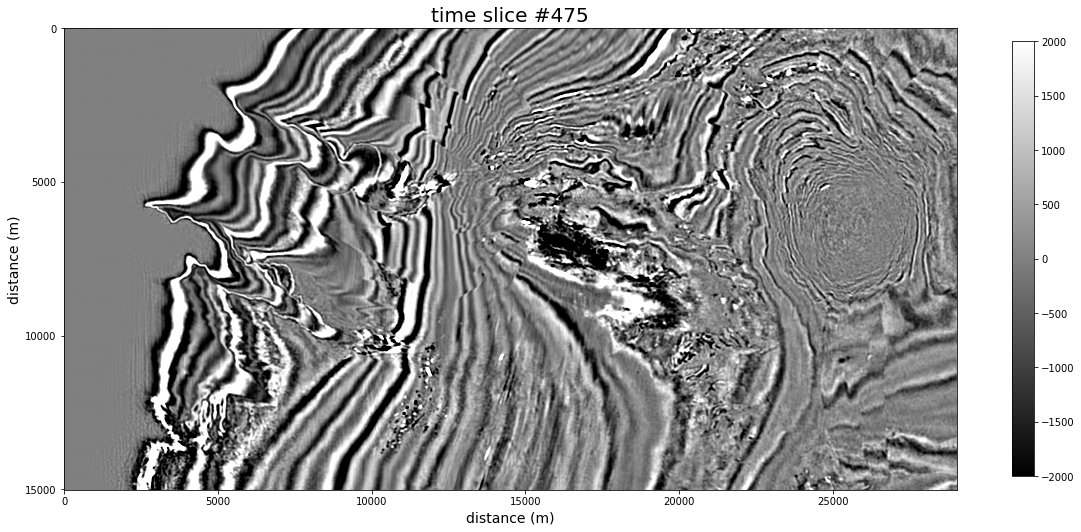

In [ ]:
# plot time slice
plt.figure(figsize=(20,20))
im = plt.imshow(vol[:,:,475].T, cmap='gray', vmin=-2000, vmax=2000, aspect=1)
yticks = np.arange(0, n_xlines+1, 200)
ytick_labels = [str(25*t) for t in yticks]
plt.yticks(ticks = yticks, labels = ytick_labels)
plt.ylabel('distance (m)', fontsize=14)
xticks = np.arange(0, n_inlines+1, 200)
xtick_labels = [str(25*t) for t in xticks]
plt.xticks(ticks = xticks, labels = xtick_labels)
plt.xlabel('distance (m)', fontsize=14)
plt.colorbar(im, shrink=0.4)
plt.title('time slice #475', fontsize=20);

Let's display now just one trace as a wiggle trace combined with a so-called variable area display (see [this](https://wiki.aapg.org/Seismic_data_display) page for more detail):

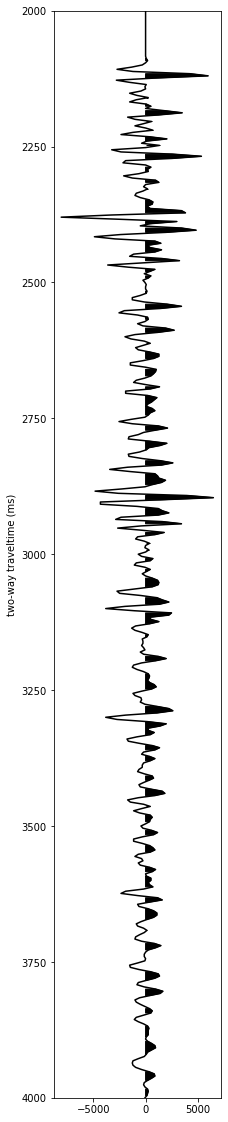

In [ ]:
plt.figure(figsize=(3,20))
tr = vol[0,0,:] # select 'first' trace in volume
twt = np.arange(0, nt) * 4
plt.plot(tr, twt, 'k')
# we use the 'fill_betweenx' function to create the variable area display:
plt.fill_betweenx(twt, tr,  0,  tr> 0.0,  color='k', alpha = 1.0)
plt.ylim(2000, 4000)
plt.ylabel('two-way traveltime (ms)')
plt.gca().invert_yaxis();

### Read and visualize horizons

Read horizon data using pandas:

In [ ]:
!wget https://www.dropbox.com/s/3b9xmcxbtnpfu6m/seafloor_XY_il_cl.csv

--2021-10-27 18:43:14--  https://www.dropbox.com/s/3b9xmcxbtnpfu6m/seafloor_XY_il_cl.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3b9xmcxbtnpfu6m/seafloor_XY_il_cl.csv [following]
--2021-10-27 18:43:15--  https://www.dropbox.com/s/raw/3b9xmcxbtnpfu6m/seafloor_XY_il_cl.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca29bfbe2e0790f381ac54cedab.dl.dropboxusercontent.com/cd/0/inline/BY2p2Ukitjk8x_iJBTqBEh-RAgozFBgvwT4SYCBmGFSf0lEb2DBY7PgDgqQXbwPMxXMVoL2iK1liVdctLvP590CsWC0Ee3uCyIlswRH3TjYcCNdMR6Uhs4fXrYkBiUVYVzcCeNirL-DvMQ-TwX3QPAo9/file# [following]
--2021-10-27 18:43:15--  https://uca29bfbe2e0790f381ac54cedab.dl.dropboxusercontent.com/cd/0/inline/BY2p2Ukitjk8x_iJBTqBEh-RAgozFBgvwT4SYCBmGFSf0lEb2DBY7PgDgqQXbwP

In [ ]:
df = pd.read_csv('seafloor_XY_il_cl.csv', 
                 names=['x', 'y', 'il', 'xl', 'z'])
df[:10]

x           y   il    xl            z
0  414187.21  3203316.25  870  6470  2119.056702
1  414205.46  3203333.33  870  6471  2118.776560
2  414223.72  3203350.41  870  6472  2118.410826
3  414241.97  3203367.50  870  6473  2117.910862
4  414260.23  3203384.58  870  6474  2117.447853
5  414278.48  3203401.66  870  6475  2117.056847
6  414296.74  3203418.74  870  6476  2116.726160
7  414314.99  3203435.82  870  6477  2116.446018
8  414333.25  3203452.91  870  6478  2116.214514
9  414351.50  3203469.99  870  6479  2115.905285

The 'x' and 'y' columns are UTM coordinates in meters (NAD27 datum, UTM zone 16). It is important that this information is known for the project and that it is not lost at any time.

Let's find the x, y coordinates and the inline, crossline numbers for the four corners of the dataset:

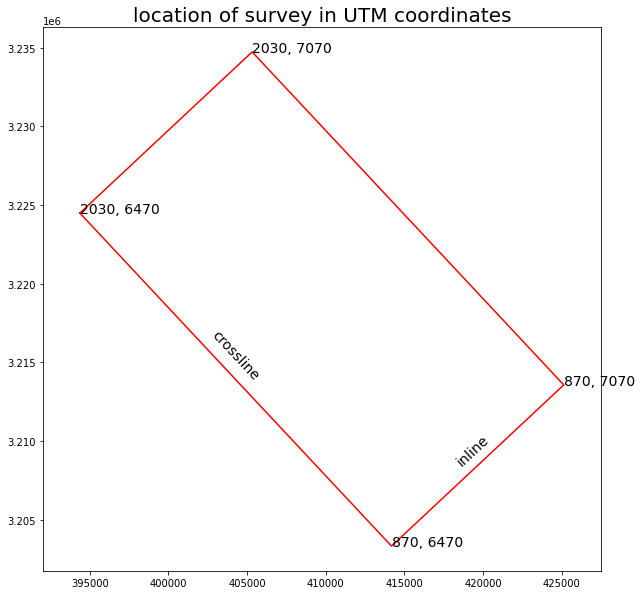

In [ ]:
min_il = np.min(np.unique(df['il'])) # minimum inline number
max_il = np.max(np.unique(df['il'])) # maximum inline number
min_xl = np.min(np.unique(df['xl'])) # minimum crossline number
max_xl = np.max(np.unique(df['xl'])) # maximum crossline number

# these next lines assume that the four corner pixels are defined in the dataframe:

urx = df.loc[df['y'].idxmax()]['x'] # upper right corner x coordinate
ury = df.loc[df['y'].idxmax()]['y'] # upper right corner y coordinate
uril = df.loc[df['y'].idxmax()]['il'] # upper right corner inline number
urxl = df.loc[df['y'].idxmax()]['xl'] # upper right corner crossline number

lrx = df.loc[df['x'].idxmax()]['x'] # lower right corner x coordinate
lry = df.loc[df['x'].idxmax()]['y'] # lower right corner y coordinate
lril = df.loc[df['x'].idxmax()]['il'] # lower right corner inline number
lrxl = df.loc[df['x'].idxmax()]['xl'] # lower right corner crossline number

ulx = df.loc[df['x'].idxmin()]['x'] # upper left corner x coordinate
uly = df.loc[df['x'].idxmin()]['y'] # upper left corner y coordinate
ulil = df.loc[df['x'].idxmin()]['il'] # upper left corner inline number
ulxl = df.loc[df['x'].idxmin()]['xl'] # upper left corner crossline number

llx = df.loc[df['y'].idxmin()]['x'] # lower left corner x coordinate
lly = df.loc[df['y'].idxmin()]['y'] # lower left corner y coordinate
llil = df.loc[df['y'].idxmin()]['il'] # lower left corner inline number
llxl = df.loc[df['y'].idxmin()]['xl'] # lower left corner crossline number

plt.figure(figsize=(10, 10))
plt.plot([ulx, urx, lrx, llx, ulx], [uly, ury, lry, lly, uly], 'r') # plot rectangle defined by corners
plt.text(ulx, uly, str(int(ulil))+', '+str(int(ulxl)), fontsize=14)
plt.text(llx, lly, str(int(llil))+', '+str(int(llxl)), fontsize=14)
plt.text(urx, ury, str(int(uril))+', '+str(int(urxl)), fontsize=14)
plt.text(lrx, lry, str(int(lril))+', '+str(int(lrxl)), fontsize=14)

plt.text((llx + lrx) * 0.5 - 1500, (lly + lry) * 0.5, 'inline', rotation=43.1, fontsize = 14)
plt.text((ulx + llx) * 0.5 - 1700, (uly + lly) * 0.5, 'crossline', rotation=-46.9, fontsize = 14)

plt.axis('equal')
plt.title('location of survey in UTM coordinates', fontsize=20);

Read z-values from dataframe into z array; this takes a while:

In [ ]:
z = np.zeros((n_inlines, n_xlines))
for i in range(len(df)):
    il_ind = df['il'][i]
    xl_ind = df['xl'][i]
    # the inline indices need to be flipped:
    z[max_il - il_ind, xl_ind - min_xl] = df['z'][i]

Check how many z-values are not defined in the horizon data:

In [ ]:
len(np.unique(df['xl'])) * len(np.unique(df['il'])) - len(df)

63

It looks like 63 values are missing. We can fill these in:

In [ ]:
# fill in the surface where there is no valid data:
zero_row, zero_col = np.where(z==0) # find locations where z = 0
for i in range(len(zero_row)):
    patch = z[zero_row[i]-2 : zero_row[i]+3, zero_col[i]-2 : zero_col[i]+3] # patch of 5x5 pixels
    z[zero_row[i], zero_col[i]] = np.mean(patch[patch!=0])  # take the mean of nonzero neighbors

Let's have a quick look at the horizon.

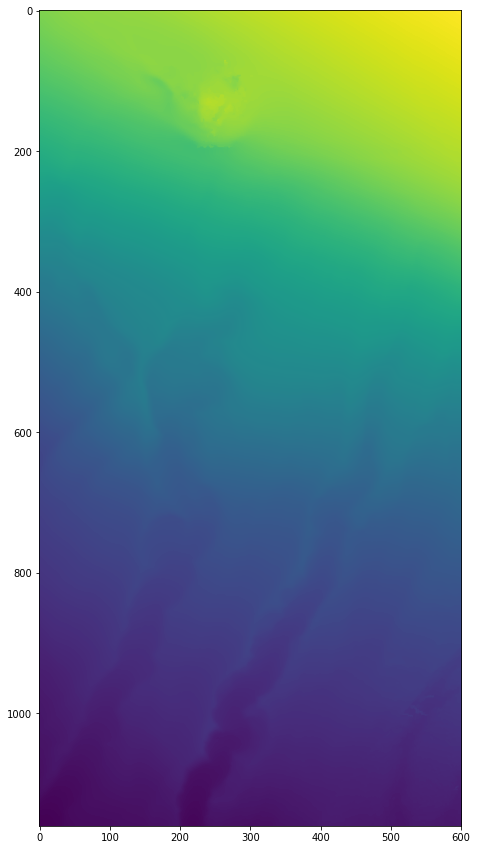

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(z, cmap='viridis_r');

This looks OK but not much morphological detail is visible. To improve the detail, we can use relief shading and contour lines:

In [ ]:
pip install cmocean

     |████████████████████████████████| 223 kB 5.2 MB/s 


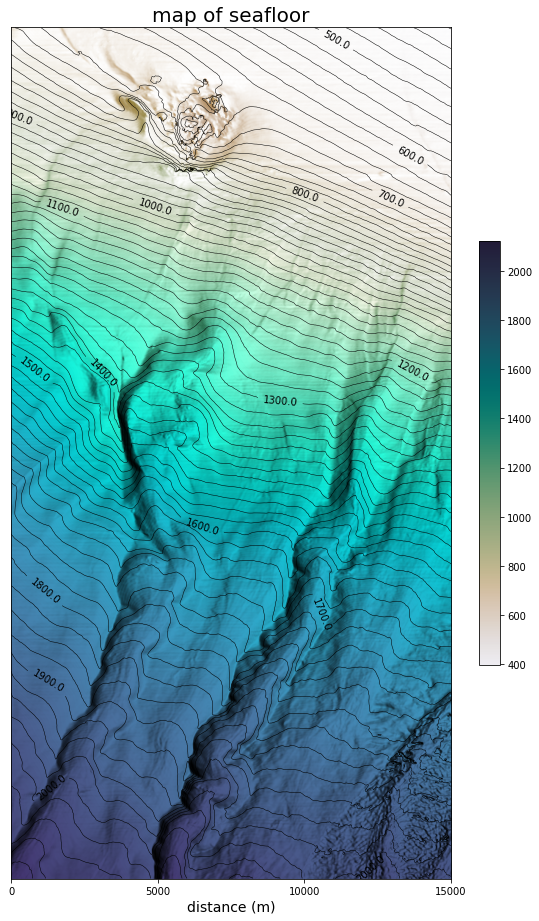

In [ ]:
# display shaded relief image
from matplotlib.colors import LightSource # for shaded relief
import cmocean # for nice colormaps

ls = LightSource(azdeg = 70, altdeg = 45)
cmap = cmocean.cm.rain
rgb = ls.shade(z, cmap, blend_mode='overlay')
fig = plt.figure(figsize=(8,15))
ax = fig.add_subplot(111)
im = ax.imshow(rgb)
ax.set_xticks([])
ax.set_yticks([])

levels = np.arange(400, np.max(z), 25)
CS = ax.contour(z, levels=levels, colors='k', linewidths=0.5)
# add labels to every 4th contourline:
ax.clabel(CS, levels[::4], inline=True, fmt='%1.1f', fontsize=10)

xticks = np.arange(0, n_inlines+1, 200)
xtick_labels = [str(25*t) for t in xticks]
plt.xticks(ticks = xticks, labels = xtick_labels)
ax.set_xlabel('distance (m)', fontsize=14)

# Use a proxy artist for the colorbar
im = ax.imshow(z, cmap=cmap)
im.remove()
fig.colorbar(im, shrink=0.4)
plt.tight_layout()
plt.title('map of seafloor', fontsize=20);

### A few good resources for working with colormaps:

https://matplotlib.org/stable/tutorials/colors/colormaps.html

https://matplotlib.org/stable/tutorials/colors/colors.html

https://matplotlib.org/cmocean/

https://bids.github.io/colormap/

https://matplotlib.org/stable/gallery/specialty_plots/advanced_hillshading.html

https://www.climate-lab-book.ac.uk/2014/end-of-the-rainbow/

https://rdcu.be/b9lm1

In [ ]:
!wget https://www.dropbox.com/s/ukq6ifg60c19v7k/below_Fuji_XY_il_cl.csv

--2021-10-27 18:52:48--  https://www.dropbox.com/s/ukq6ifg60c19v7k/below_Fuji_XY_il_cl.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ukq6ifg60c19v7k/below_Fuji_XY_il_cl.csv [following]
--2021-10-27 18:52:48--  https://www.dropbox.com/s/raw/ukq6ifg60c19v7k/below_Fuji_XY_il_cl.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc97d351c91cf40d302ab01d4b0e.dl.dropboxusercontent.com/cd/0/inline/BY33nlpXAn8a3xSlvV6CBsLKZjdzQsdiGnOpqZKXoSKLQCAAzITZWmpzC9j7tzLmQLssvlyC0-rPQ5Hh1D4UxtqZ9ar5Hl7VMxQERmQln34xodZLidln0PZCIGSVzZ2Waa7BUXxD8iu8jZ0igQDdU9BD/file# [following]
--2021-10-27 18:52:48--  https://uc97d351c91cf40d302ab01d4b0e.dl.dropboxusercontent.com/cd/0/inline/BY33nlpXAn8a3xSlvV6CBsLKZjdzQsdiGnOpqZKXoSKLQCAAzITZWmpzC

In [ ]:
# read horizon data
df = pd.read_csv('below_Fuji_XY_il_cl.csv', 
                 names=['x', 'y', 'il', 'xl', 'z'])
df[:10]

x           y   il    xl            z
0  414187.21  3203316.25  870  6470  2427.199125
1  414205.46  3203333.33  870  6471  2427.102804
2  414223.72  3203350.41  870  6472  2427.065134
3  414241.97  3203367.50  870  6473  2427.044153
4  414260.23  3203384.58  870  6474  2426.855803
5  414278.48  3203401.66  870  6475  2427.333117
6  414296.74  3203418.74  870  6476  2428.798199
7  414314.99  3203435.82  870  6477  2429.664850
8  414333.25  3203452.91  870  6478  2429.777861
9  414351.50  3203469.99  870  6479  2429.334164

In [ ]:
len(np.unique(df['xl'])) * len(np.unique(df['il'])) - len(df)

1819

In [ ]:
# read z-values from dataframe into z array; this takes a while:
base_Fuji = np.zeros((n_inlines, n_xlines))
for i in range(len(df)):
    il_ind = df['il'][i]
    xl_ind = df['xl'][i]
    # the inline indices need to be flipped:
    base_Fuji[max_il - il_ind, xl_ind - min_xl] = df['z'][i]

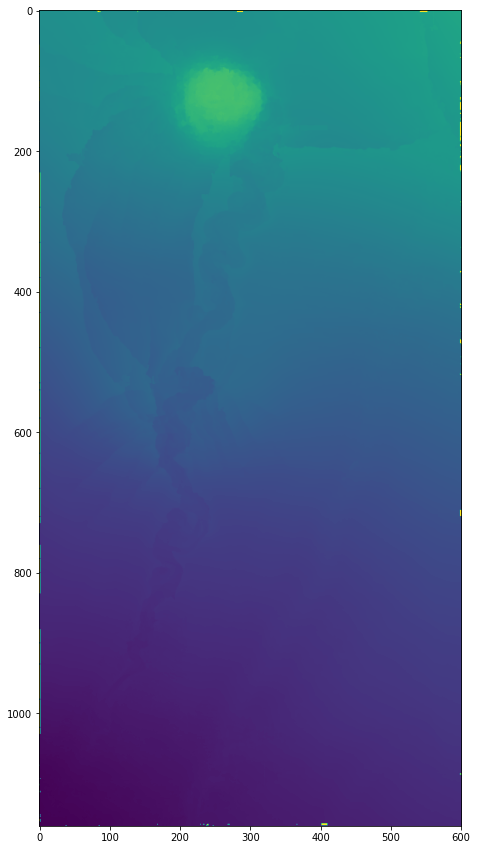

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(base_Fuji, cmap='viridis_r')

In [ ]:
# fill in and despike the surface:
zero_row, zero_col = np.where(base_Fuji==0) # find locations where z = 0
for i in range(len(zero_row)):
    if zero_col[i] == 0:
        patch = base_Fuji[zero_row[i]-2 : zero_row[i]+3, zero_col[i] : zero_col[i]+3]
        base_Fuji[zero_row[i], zero_col[i]] = np.mean(patch[patch!=0])  # take the mean of nonzero neighbors
    elif zero_col[i] == 1:
        patch = base_Fuji[zero_row[i]-2 : zero_row[i]+3, zero_col[i]-1 : zero_col[i]+3]
        base_Fuji[zero_row[i], zero_col[i]] = np.mean(patch[patch!=0])  # take the mean of nonzero neighbors
    elif zero_col[i] == n_xlines-1:
        patch = base_Fuji[zero_row[i]-2 : zero_row[i]+3, zero_col[i]-3 : zero_col[i]]
        base_Fuji[zero_row[i], zero_col[i]] = np.mean(patch[patch!=0])  # take the mean of nonzero neighbors
    elif zero_col[i] == n_xlines-2:
        patch = base_Fuji[zero_row[i]-2 : zero_row[i]+3, zero_col[i]-3 : zero_col[i]+1]
        base_Fuji[zero_row[i], zero_col[i]] = np.mean(patch[patch!=0])  # take the mean of nonzero neighbors
    elif zero_row[i] == 0:
        patch = base_Fuji[zero_row[i] : zero_row[i]+3, zero_col[i]-2 : zero_col[i]+3]
        base_Fuji[zero_row[i], zero_col[i]] = np.mean(patch[patch!=0])  # take the mean of nonzero neighbors
    elif zero_row[i] == 1:
        patch = base_Fuji[zero_row[i]-1 : zero_row[i]+3, zero_col[i]-2 : zero_col[i]+3]
        base_Fuji[zero_row[i], zero_col[i]] = np.mean(patch[patch!=0])  # take the mean of nonzero neighbors
    elif zero_row[i] == n_inlines-1:
        patch = base_Fuji[zero_row[i]-3 : zero_row[i], zero_col[i]-2 : zero_col[i]+3]
        base_Fuji[zero_row[i], zero_col[i]] = np.mean(patch[patch!=0])  # take the mean of nonzero neighbors
    elif zero_row[i] == n_inlines-2:
        patch = base_Fuji[zero_row[i]-3 : zero_row[i]+1, zero_col[i]-2 : zero_col[i]+3]
        base_Fuji[zero_row[i], zero_col[i]] = np.mean(patch[patch!=0])  # take the mean of nonzero neighbors
    else:
        patch = base_Fuji[zero_row[i]-2 : zero_row[i]+3, zero_col[i]-2 : zero_col[i]+3]
        base_Fuji[zero_row[i], zero_col[i]] = np.mean(patch[patch!=0])  # take the mean of nonzero neighbors

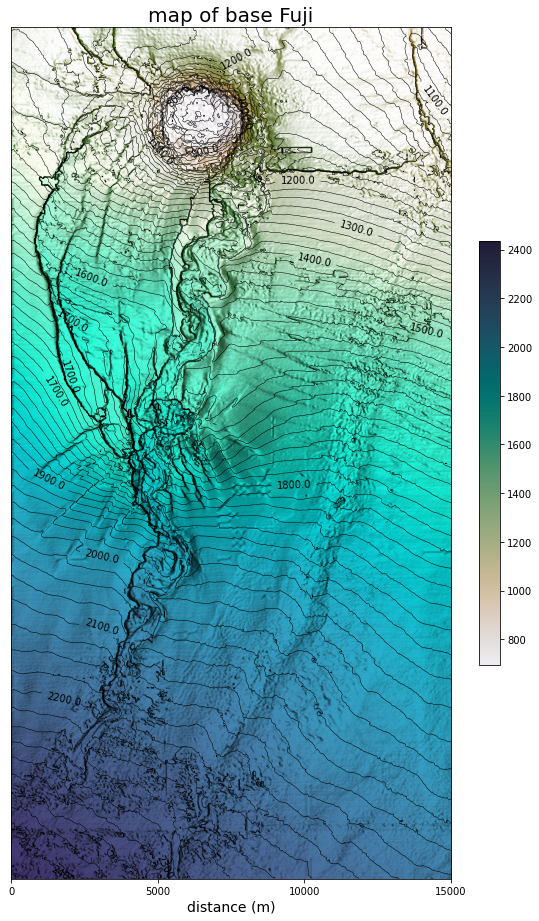

In [ ]:
# display shaded relief image
ls = LightSource(azdeg = 70, altdeg = 45)
cmap = cmocean.cm.rain
rgb = ls.shade(base_Fuji, cmap, blend_mode='overlay')
fig = plt.figure(figsize=(8,15))
ax = fig.add_subplot(111)
im = ax.imshow(rgb)
ax.set_xticks([])
ax.set_yticks([])

levels = np.arange(700, np.max(base_Fuji), 25)
CS = ax.contour(base_Fuji, levels=levels, colors='k', linewidths=0.5)
# add labels to every 4th contourline:
ax.clabel(CS, levels[::4], inline=True, fmt='%1.1f', fontsize=10)

xticks = np.arange(0, n_inlines+1, 200)
xtick_labels = [str(25*t) for t in xticks]
plt.xticks(ticks = xticks, labels = xtick_labels)
ax.set_xlabel('distance (m)', fontsize=14)

# Use a proxy artist for the colorbar
im = ax.imshow(base_Fuji, cmap=cmap)
im.remove()
fig.colorbar(im, shrink=0.4)
plt.tight_layout()
plt.title('map of base Fuji', fontsize=20);

### An optional detour: If you want to make a properly georeferenced map

In [ ]:
df = pd.read_csv('seafloor_XY_il_cl.csv', 
                 names=['x', 'y', 'il', 'xl', 'z'])
df[:10]

x           y   il    xl            z
0  414187.21  3203316.25  870  6470  2119.056702
1  414205.46  3203333.33  870  6471  2118.776560
2  414223.72  3203350.41  870  6472  2118.410826
3  414241.97  3203367.50  870  6473  2117.910862
4  414260.23  3203384.58  870  6474  2117.447853
5  414278.48  3203401.66  870  6475  2117.056847
6  414296.74  3203418.74  870  6476  2116.726160
7  414314.99  3203435.82  870  6477  2116.446018
8  414333.25  3203452.91  870  6478  2116.214514
9  414351.50  3203469.99  870  6479  2115.905285

In [ ]:
# check if corner values are in the dataframe:
print(z[0,0])
print(z[-1,0])
print(z[0,-1])
print(z[-1,-1])

726.4705896377563
2119.0567016601562
398.6608684062958
2001.495361328125


Let's find the angle of the crossline direction relative to the E-W (horizontal) direction:

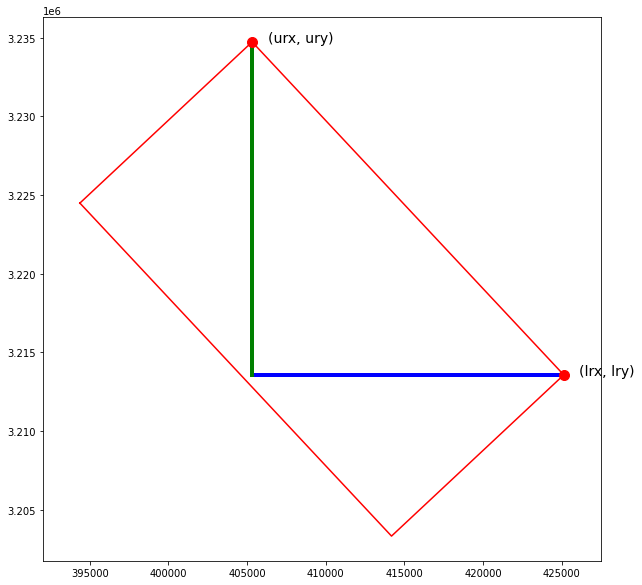

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot([ulx, urx, lrx, llx, ulx], [uly, ury, lry, lly, uly], 'r')
plt.plot([lrx, urx], [lry, lry], 'b', linewidth = 4)
plt.plot([urx, urx], [lry, ury], 'g', linewidth = 4)
plt.plot(urx, ury, 'ro', markersize=10)
plt.text(urx+1000, ury, '(urx, ury)', fontsize=14)
plt.plot(lrx, lry, 'ro', markersize=10)
plt.text(lrx+1000, lry, '(lrx, lry)', fontsize=14)
plt.axis('equal');

In [ ]:
np.rad2deg(np.arctan2(ury - lry, lrx - urx))

46.89907760788802

So the angle relative to the North direction is 90 - 46.9 = 43.1.

Now we are ready to rotate the map and display it in UTM coordinates:

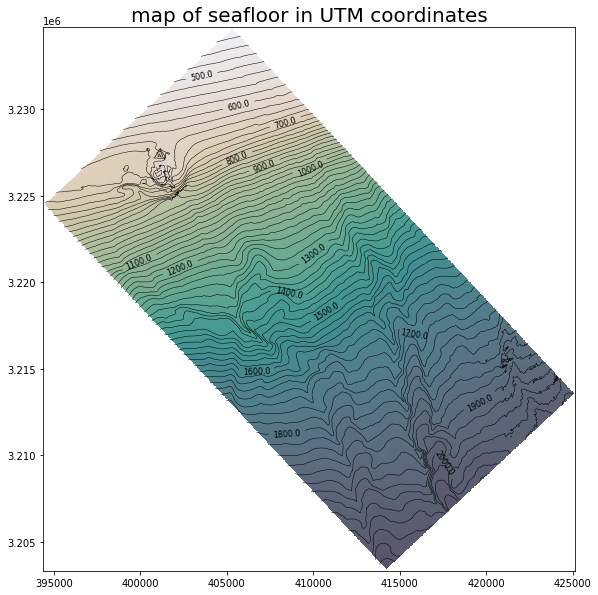

In [ ]:
from scipy.ndimage import rotate
z_rot = rotate(z, 43.1, reshape=True) # rotate map 43.1 degrees counterclockwise from N
z_rot[z_rot==0] = np.nan # replace zeros with nans
plt.figure(figsize=(10,10))
plt.imshow(z_rot, extent=[ulx, lrx, lly, ury], cmap=cmocean.cm.rain, alpha=0.75)
levels = np.arange(400, np.nanmax(z_rot), 25)
# I am not sure why the contours need to be flipped, but they do...
CS = plt.contour(z_rot[::-1,:], extent=[ulx, lrx, lly, ury], levels=levels, colors='k', linewidths=0.5)
plt.xlim(ulx, lrx)
plt.ylim(lly, ury)
# add labels to every 4th contourline:
ax.clabel(CS, levels[::4], inline=True, fmt='%1.1f', fontsize=8)
plt.title('map of seafloor in UTM coordinates', fontsize=20);